# Deals with data exploration for STUDY1 data

In [2]:
%config IPCompleter.greedy=True

In [1]:
# %load UtilityFunctions.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.style as style
style.use('ggplot')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def readDataFromCsv(file):
    print ("Reading the file from: ",file)
    df = pd.read_csv(file)
    return df

def transformData(df):
    print ("transforming the data and selecting few columns..")
    result = df[['id','timestamp','user_id','event','App','User', 'Cond', 'sessionNr', 'SessionType','button_pressed', 'correct_answer',
    'x_location','y_location','button_height', 'target_height', 'button_width', 'target_width', 'button_origin_x', 'target_origin_x', 
    'button_origin_y', 'target_origin_y', 'button_touch_x_location', 'target_touch_x_location', 
    'button_touch_y_location', 'target_touch_y_location', 'difference.touch_buttonCenter_x', 
    'difference.touch_buttonCenter_y', 'touchAccuracy_x', 'touchAccuracy_y', 'touchAccuracy', 
    'x_location.down', 'x_location.release', 'y_location.down', 'y_location.release', 'swipe_length.x', 
    'swipe_length.y', 'swipe_length', 'touch.duration', 'swipe_speed', 'swipe_speed.x', 
    'swipe_speed.y', 'time_between_touches']]
    print ("transformation completed!")
    return result

def getSubset(df):
    result = df[['user_id','App', 'Cond', 'sessionNr','x_location.down', 'y_location.down','x_location.release',
    'y_location.release','button_touch_x_location', 'target_touch_x_location', 
    'button_touch_y_location', 'target_touch_y_location',  'swipe_length','swipe_length.x', 
    'swipe_length.y',  'touch.duration', 'time_between_touches','swipe_speed', 'swipe_speed.x', 
    'swipe_speed.y', 'difference.touch_buttonCenter_x', 
    'difference.touch_buttonCenter_y', 'touchAccuracy_x', 'touchAccuracy_y', 'touchAccuracy', 
     ]]
    return result

def joinDataset(df1, df2, cond):
    df_result= pd.merge(df1, df2, on=cond)
    print("Join operation successful !")
    return df_result

def deleteColumns(df,columns):
    df.drop(columns, axis=1)
    


In [8]:
# load datasets
df_study1 = readDataFromCsv("../datasets/rawData.firstTry/04_DataExperiment_generalTouchFeatures_study1.csv")
df_uxratings_study1 = readDataFromCsv("../datasets/rawData.firstTry/UXRatings_study1.csv")

Reading the file from:  ../datasets/rawData.firstTry/04_DataExperiment_generalTouchFeatures_study1.csv
Reading the file from:  ../datasets/rawData.firstTry/UXRatings_study1.csv


In [9]:
# select only few columns
df_study1_subset= transformData(df_study1)

transforming the data and selecting few columns..
transformation completed!


In [10]:
# consider only touch events
df_study1_touchEvent=df_study1_subset.loc[df_study1_subset['event'].isin(['touch.down','touch.release'])]

In [11]:
print("Touch down events count: ",len(df_study1_subset['event'].isin(['touch.down'])))
print("Touch release events count: ",len(df_study1_subset['event'].isin(['touch.release'])))

Touch down events count:  76568
Touch release events count:  76568


In [13]:
df_study1_touches =df_study1_subset.loc[df_study1_subset['event'].isin(['touch.down'])]
df_study1_touches.head()

,id,timestamp,user_id,event,App,User,Cond,sessionNr,SessionType,button_pressed,correct_answer,x_location,y_location,button_height,target_height,button_width,target_width,button_origin_x,target_origin_x,button_origin_y,target_origin_y,button_touch_x_location,target_touch_x_location,button_touch_y_location,target_touch_y_location,difference.touch_buttonCenter_x,difference.touch_buttonCenter_y,touchAccuracy_x,touchAccuracy_y,touchAccuracy,x_location.down,x_location.release,y_location.down,y_location.release,swipe_length.x,swipe_length.y,swipe_length,touch.duration,swipe_speed,swipe_speed.x,swipe_speed.y,time_between_touches
2,29061,2016-11-15 15:09:34,100,touch.down,Quiz,100,TinyIcons,1,Quiz.TinyIcons.100,True,True,964.5,727.0,13.0,13.0,93.0,93.0,899.0,899.0,723.0,723.0,65.5,65.5,4.0,4.0,19.0,-2.5,0.408602,-0.384615,-0.157155,964.5,964.5,727.0,727.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,29063,2016-11-15 15:09:43,100,touch.down,Quiz,100,TinyIcons,1,Quiz.TinyIcons.100,True,False,984.0,633.0,13.0,13.0,89.0,89.0,903.0,903.0,633.0,633.0,81.0,81.0,0.0,0.0,36.5,-6.5,0.820225,-1.000000,-0.820225,984.0,984.0,633.0,633.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,9.0
8,29065,2016-11-15 15:09:46,100,touch.down,Quiz,100,TinyIcons,1,Quiz.TinyIcons.100,False,False,975.5,586.0,13.0,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,-8.5,0.629213,-1.307692,-0.822818,975.5,975.5,586.0,586.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0
11,29067,2016-11-15 15:09:47,100,touch.down,Quiz,100,TinyIcons,1,Quiz.TinyIcons.100,True,False,966.0,592.5,13.0,13.0,89.0,89.0,903.0,903.0,588.0,588.0,63.0,63.0,4.5,4.5,18.5,-2.0,0.415730,-0.307692,-0.127917,966.0,966.0,592.5,592.5,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
14,29069,2016-11-15 15:09:48,100,touch.down,Quiz,100,TinyIcons,1,Quiz.TinyIcons.100,True,True,979.0,685.0,13.0,13.0,89.0,89.0,903.0,903.0,678.0,678.0,76.0,76.0,7.0,7.0,31.5,0.5,0.707865,0.076923,0.054451,979.0,979.0,685.0,685.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0


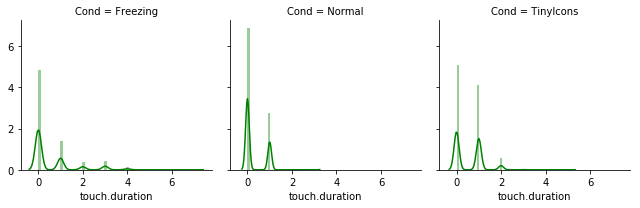

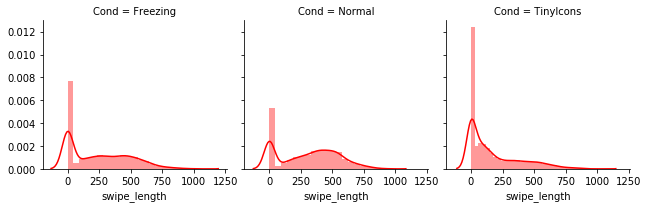

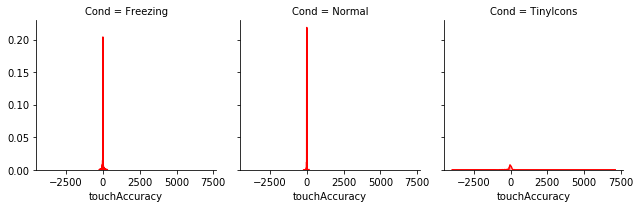

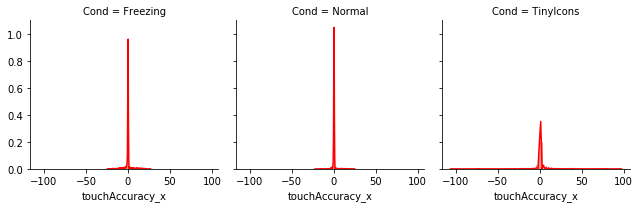

In [28]:
# visualize clean data with respect to condition
df_study1_touches = df_study1_touches.sort_values(by="Cond",ascending=True)
g = sns.FacetGrid(df_study1_touches, col="Cond") 
# g.map(sns.jointplot, "swipe_length_mean",'PQ',kind='kde')
g.map(sns.distplot, 'touch.duration',color='g')

g = sns.FacetGrid(df_study1_touches, col="Cond") 
# g.map(sns.jointplot, "swipe_length_mean",'PQ',kind='kde')
g.map(sns.distplot, 'swipe_length',color='r')

g = sns.FacetGrid(df_study1_touches, col="Cond") 
# g.map(sns.jointplot, "swipe_length_mean",'PQ',kind='kde')
g.map(sns.distplot, 'touchAccuracy',color='r')


g = sns.FacetGrid(df_study1_touches, col="Cond") 
# g.map(sns.jointplot, "swipe_length_mean",'PQ',kind='kde')
g.map(sns.distplot, 'touchAccuracy_x',color='r')

In [14]:
# check for null values
df_study1_touches.isnull().sum()

id                                    0
timestamp                             0
user_id                               0
event                                 0
App                                   0
User                                  0
Cond                                  0
sessionNr                             0
SessionType                           0
button_pressed                        0
correct_answer                        0
x_location                            0
y_location                            0
button_height                       132
target_height                      7365
button_width                        132
target_width                       7365
button_origin_x                    7338
target_origin_x                    7365
button_origin_y                    7338
target_origin_y                    7365
button_touch_x_location            7338
target_touch_x_location            7365
button_touch_y_location            7338
target_touch_y_location            7365


In [26]:
# %load CleaningScripts/script_study1.py
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
def fillMissingValues(df):
    df_temp=df.dropna(subset=['x_location.release','y_location.release'])
    #delete the infinites from the table
    df_withoutinf= df_temp[df_temp['swipe_speed']!= np.inf]
    df_withoutinf_withoutna = df_withoutinf
    df_withoutinf_withoutna['swipe_speed']= df_withoutinf.swipe_speed.fillna(0)
    df_withoutinf_withoutna['swipe_speed.x']= df_withoutinf['swipe_speed.x'].fillna(0)
    df_withoutinf_withoutna['swipe_speed.y']= df_withoutinf['swipe_speed.x'].fillna(0)
    df_temp=df_withoutinf_withoutna
    df_temp_1 = df_withoutinf_withoutna
    df_temp.dropna(subset=['target_height'],inplace=True)
    df_temp.dropna(subset=['time_between_touches'],inplace=True)
    df_withoutinf_withoutna = df_temp
    print(df_withoutinf_withoutna.shape)
    return df_withoutinf_withoutna

def DropMissingValues(df):
    df =df.replace(np.inf,np.nan)
    df =df.replace(-np.inf,np.nan)
    df_temp = df.dropna()
    return df_temp

In [27]:
# df_study1_touches.to_csv('rawData.firstTry/touchData_study1.csv')

In [29]:
df_withoutinf_withoutna = DropMissingValues(df_study1_touches)
print(df_withoutinf_withoutna.shape)

(5154, 42)


In [32]:
# df_withoutinf_withoutna = getSubset(df_study1_touches_temp)
print(df_withoutinf_withoutna.isnull().values.any())
print(df_withoutinf_withoutna.shape)
# df_withoutinf_withoutna.columns

False
(5154, 42)


In [33]:
df_withoutinf_withoutna.event.unique()

array(['touch.down'], dtype=object)

In [34]:
df_withoutinf_withoutna.to_csv('rawData.firstTry/04_DataExperiment_generalTouchFeatures_study1_withoutNullvalues.csv')

In [35]:
df_withoutinf_withoutna = getSubset(df_withoutinf_withoutna)

In [36]:
df_withoutinf_withoutna.sessionNr.unique()
df_withoutinf_withoutna.loc[df_withoutinf_withoutna['sessionNr']==2]

,user_id,App,Cond,sessionNr,x_location.down,y_location.down,x_location.release,y_location.release,button_touch_x_location,target_touch_x_location,button_touch_y_location,target_touch_y_location,swipe_length,swipe_length.x,swipe_length.y,touch.duration,time_between_touches,swipe_speed,swipe_speed.x,swipe_speed.y,difference.touch_buttonCenter_x,difference.touch_buttonCenter_y,touchAccuracy_x,touchAccuracy_y,touchAccuracy
101,100,Quiz,Normal,2,925.5,428.5,925.5,428.5,225.5,225.5,38.5,38.5,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,79.5,-8.5,0.544521,-0.180851,-0.098477
156,100,Quiz,Normal,2,913.0,333.0,913.0,333.0,147.0,147.0,69.0,69.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,34.0,22.0,0.300885,0.468085,0.140840


In [38]:
# %load EDA_operations.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.style as style
plt.style.use('ggplot')
# plt.style.context('dark-background')

#################################  Functions for EDA   ##########################################################################

def getInfo(df,name):
    print ("Shape of %s data: %s" %(name,df.shape))
    print("info of %s data" %name)
    print (df.info())
    
def generateHeatMap(df):
    corr_df= df.corr()
    # Determines the correlation between the variables.
    fig, ax =  plt.subplots(figsize=(25,25)) 
    sns.set()
    ax = sns.heatmap(df.corr(), annot=True, linewidths = 0.5, cmap='viridis')

def generateBoxplot(df,dims):
    l = df.columns.values
    number_of_columns=12
    number_of_rows = len(l)-1/number_of_columns
    plt.figure(figsize=(number_of_columns,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,10,i+1)
#         sns.set_style('whitegrid')
#         print(i)
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
#     fig, ax = plt.subplots(figsize=dims)
#     # df_study1_subset = df
#     ax = sns.boxplot(ax=ax, data=df,orient='v')
#     plt.xticks(rotation=90)
#     plt.show()

def plotDistribution(df):
    import warnings
    warnings.filterwarnings('ignore')
    l = df.columns.values
    number_of_columns=12
    number_of_rows = len(l)-1/number_of_columns
    plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,4,i+1)
        sns.distplot(df[l[i]],kde=True) 
#     sns.kdeplot(df_temp[l[i]],shade=True)

def computeStats(df):
    df_temp =df
#     df_temp=df.drop(['User'],axis=1)
#     df_temp=df_temp.drop(['id'],axis=1)
#     print(df_temp.columns)
    df1= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).mean()
    compute(df1,"mean")
    df2= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).median()
    compute(df2,"median")
    df3= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).skew()
    compute(df3,"skew")
    df4= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).apply(pd.DataFrame.kurt)
    compute(df4,"kurt")
    df5= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).quantile()
    compute(df5,"quantile")
    df6= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).std()
    compute(df6,"std")
    df7= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).mad()
    compute(df7,"mad")
    df8= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).max()
    compute(df8,"max")
    df9= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).min()
    compute(df9,"min")
    df10= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).count()
    compute(df10,"count")
    
    result = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=1, sort=False)
    result.reset_index(inplace=True)
    result['user_id']=pd.to_numeric(result['user_id'])
    result['sessionNr']=pd.to_numeric(result['sessionNr'])
    return result


def compute(df,name):
    for col in df.columns:
        df.rename(index=str,columns={col:col+"_"+name},inplace=True)
    if 'user_id'+'_'+name in df.columns or 'sessionNr'+'_'+name in df.columns or 'App'+'_'+name in df.columns or 'Cond'+'_'+name in df.columns:
        df.drop('user_id'+'_'+name,axis=1,inplace=True)
        df.drop('sessionNr'+'_'+name,axis=1,inplace=True)


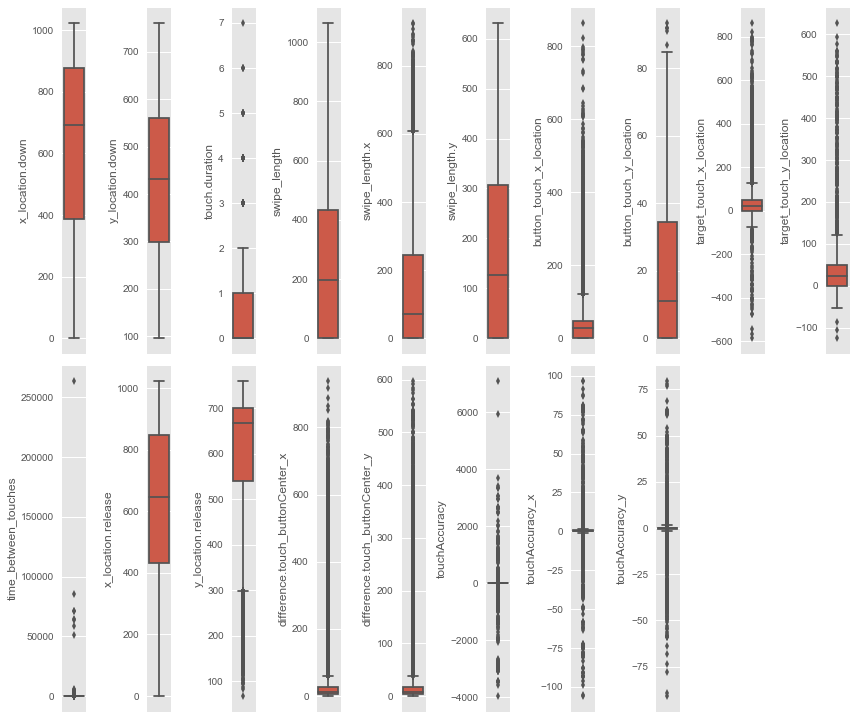

In [39]:
# check for any outliers
df = pd.read_csv('../datasets/files_generated/study1_cleandata.csv')
df = df.drop(['App', 'Cond', 'sessionNr','user_id'],axis=1)
generateBoxplot(df.select_dtypes(['float64']),None)

In [46]:
df_final_1 = computeStats(df_withoutinf_withoutna)
print(df_final_1.isnull().values.any())
print(df_final_1.shape)

True
(292, 214)


In [47]:
df_final_1.isnull().sum().sort_values(ascending=False)

swipe_speed.y_kurt                      104
y_location.down_kurt                    104
x_location.release_kurt                 104
y_location.release_kurt                 104
button_touch_x_location_kurt            104
target_touch_x_location_kurt            104
button_touch_y_location_kurt            104
target_touch_y_location_kurt            104
swipe_length_kurt                       104
swipe_length.x_kurt                     104
swipe_length.y_kurt                     104
touch.duration_kurt                     104
time_between_touches_kurt               104
swipe_speed_kurt                        104
swipe_speed.x_kurt                      104
x_location.down_kurt                    104
touchAccuracy_kurt                      104
touchAccuracy_y_kurt                    104
touchAccuracy_x_kurt                    104
difference.touch_buttonCenter_y_kurt    104
difference.touch_buttonCenter_x_kurt    104
button_touch_x_location_skew             95
button_touch_y_location_skew    

In [48]:
df_final_1= df_final_1.dropna()
print('contains null values?: ',df_final_1.isnull().values.any())
print(df_final_1.shape)

contains null values?:  False
(188, 214)


In [49]:
df_final_1.sessionNr.dtype
df_result= pd.merge(df_final_1, df_uxratings_study1, on=['user_id','App','Cond','sessionNr'])
df_result.shape

(188, 225)

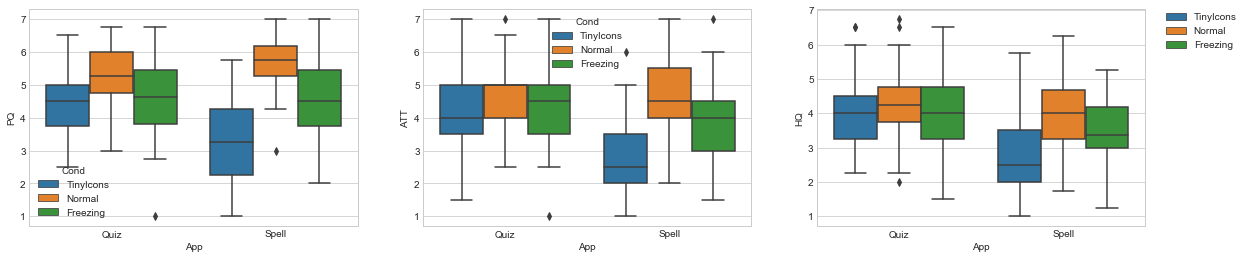

In [72]:
# check for the distribution of ux ratings for both the apps and cond
df_result.PQ.unique()
df_result.PQ.value_counts()
#ratings are given between 2.50 to 6
# average being 4.75
# lowest is 6  and 3.25
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))
sns.boxplot(x='App',y="PQ",hue='Cond',data=df_uxratings_study1,ax=ax1)
sns.boxplot(x='App',y="ATT", hue='Cond',data=df_uxratings_study1,ax=ax2)
sns.boxplot(x='App',y="HQ",hue='Cond',data=df_uxratings_study1,ax=ax3)

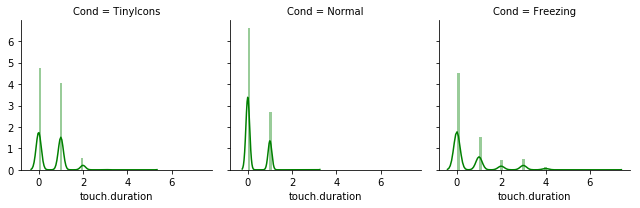

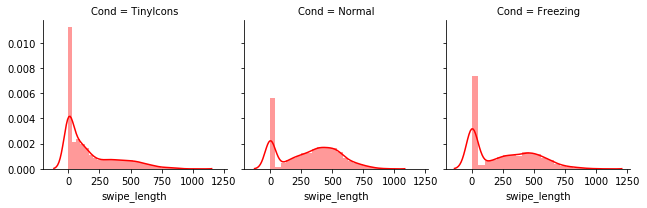

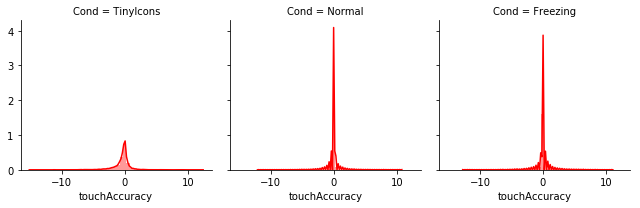

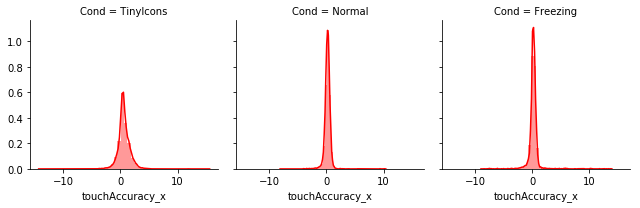

In [5]:
# # visualize outlier treated clean data with respect to condition
df_study1_touches = pd.read_csv("../datasets/files_generated/study1_cleandata_out_mahalanobis.csv")
g = sns.FacetGrid(df_study1_touches, col="Cond") 
g.map(sns.distplot, 'touch.duration',color='g')

g = sns.FacetGrid(df_study1_touches, col="Cond") 
g.map(sns.distplot, 'swipe_length',color='r')

g = sns.FacetGrid(df_study1_touches, col="Cond") 
g.map(sns.distplot, 'touchAccuracy',color='r')


g = sns.FacetGrid(df_study1_touches, col="Cond") 
g.map(sns.distplot, 'touchAccuracy_x',color='r')